### Designing the python based interactive chatbot

#### Step 1: Importing Libraries

In [37]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brindha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brindha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brindha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brindha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Step 2: Loading and Preprocessing the data

In [39]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents_chat.json').read()
intents = json.loads(data_file)

In [40]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        # taking each word and tokenizing it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # adding documents
        documents.append((w, intent['tag']))

        # adding classes to our class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

#### Step 3: Lemmatization, that can convert words into the lemma form so that we can reduce all the canonical words. Hence, we lemmatize each word and remove the duplicate words.

In [41]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))
print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

181 documents
21 classes ['Bot', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket', 'about', 'app', 'competitions', 'contact', 'email_id', 'forgot_password', 'goodbye', 'greeting', 'hours', 'job_related_problem', 'missing_id', 'newcourse', 'options', 'project_handling_queries', 'thanks']
221 unique lemmatized words ["'s", ',', '2021', '@', 'a', 'abc', 'able', 'abx', 'access', 'account', 'activation', 'ada', 'adam', 'additional', 'address', 'am', 'an', 'ann', 'another', 'anyone', 'application', 'apply', 'are', 'artificial', 'assignment', 'available', 'awesome', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'be', 'been', 'bloody', 'boosting', 'bot', 'bye', 'can', 'challenging', 'chatting', 'classification', 'classroom', 'competition', 'complaint', 'complete', 'contact', 'could', 'course', 'create', 'cross', 'day', 'deep', 'did', 'diffult', 'do', 'doing', 'enroll', 'ensemble', 'epoch', 'event', 'explain', 'for', 'forest', 'forgets', 'forgot', 'forward', 'function', 'future', 'get', 'gmail.com'

#### Step 4: Building the Training and Testing data

In [42]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # creating our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# creating train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-42-1a891a7a8859>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


#### Step 5: Model to train the data

In [43]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/200
37/37 [==============================] - 1s 5ms/step - loss: 2.9168 - accuracy: 0.1932
Epoch 2/200
37/37 [==============================] - 0s 4ms/step - loss: 2.4790 - accuracy: 0.2977
Epoch 3/200
37/37 [==============================] - 0s 4ms/step - loss: 2.3093 - accuracy: 0.3032
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 2.2785 - accuracy: 0.2957
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 2.1290 - accuracy: 0.3457
Epoch 6/200
37/37 [==============================] - 0s 4ms/step - loss: 2.1049 - accuracy: 0.4135
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 1.6231 - accuracy: 0.5800
Epoch 8/200
37/37 [==============================] - 0s 4ms/step - loss: 1.6843 - accuracy: 0.4758
Epoch 9/200
37/37 [==============================] - 0s 4ms/step - loss: 1.6561 - accuracy: 0.4835
Epoch 10/200
37/37 [==============================] - 0s 4ms/step - loss: 1.4341 - accuracy: 0.5259
Epoch 11/

#### Accuracy & Loss Plot

dict_keys(['loss', 'accuracy'])


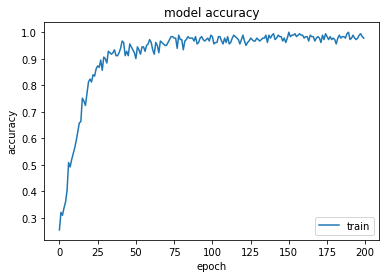

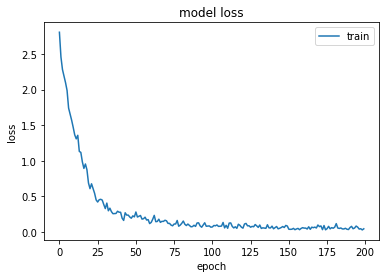

In [44]:
import matplotlib.pyplot as plt
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#### Step 6: Building the Chatbot

In [45]:
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('intents_chat.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [46]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

#### Step 7: Creating the GUI

In [47]:
# tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Academic Support")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()